# Binary classification of IMDB reviews


Binary classification of the [50000 movie reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download) according to their sentiment analysis label - positive or negative. In this notebook I will be using a logistic regression to classify the reviews, finetune it, compare its performance against a baseline model, and evaluate it using several metrics.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#print(df.isnull().sum)
print(df.isna().any())

review       False
sentiment    False
dtype: bool


In [7]:
print(df['sentiment'].nunique())
print(df['sentiment'].unique())

2
['positive' 'negative']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.describe(include = 'all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [14]:
df.review.duplicated().sum() #are there any identical reviews?

418

In [21]:
df.loc[df.review.duplicated()][:20] #let's have a look at the first 20 reviews that are the same

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


The reviews seem genuine and not one liners, but since they occur more than once, I prefer to keep only one and drop the rest:

In [25]:
df.drop_duplicates(inplace = True)

<Axes: xlabel='sentiment', ylabel='count'>

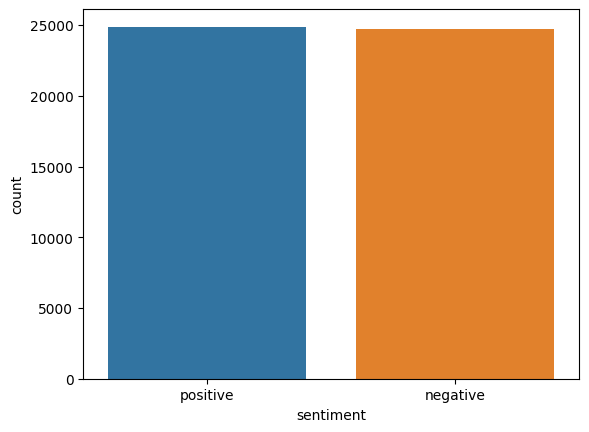

In [27]:
#df['sentiment'].value_counts().plot(kind = 'bar') #same but less pretty
import seaborn as sns
sns.countplot(x=df['sentiment'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


The exploratory analysis shows that this is a clean dataset with 50/50 split of positive and negative reviews and no missing values. There was a relatively small number (418) entries that were duplicates, and even though that is less than 1% (0.836% to be exact) of the entries, I removed those.

Next step: recode the categorical sentiment labels into binary numerical ones for machine learning using `LabelEncoder()` from `sklearn`.

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sentiment = le.fit_transform(df.sentiment)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Text Vectorization

Transforming the raw text of the reviews into machine-readable vectors.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#creating the vectorized data and storing it in a variable X
X = vectorizer.fit_transform(df['review'])

In [32]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [33]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


We now have a sparse matrix and are ready to feed it to a machine learning algorithm.

# Logistic Regression Model

Training and testing a logistic regression model on the training data:

In [34]:
from sklearn.model_selection import train_test_split as tts
y = df.sentiment

X_train, X_test, y_train, y_test = tts(X, y,
                                       test_size = 0.2,
                                       train_size = 0.8,
                                       random_state = 100,
                                       shuffle = True)

In [35]:
print(X_train.shape[0], X_test.shape[0], len(y_train), len(y_test)) #sanity checks

39665 9917 39665 9917


In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 100,
                         max_iter = 100000)

clf.fit(X_train, y_train)

#clf.score(X_test, y_test)

LogisticRegression(max_iter=100000, random_state=100)

In [37]:
y_pred_train = clf.predict(X_train) #creating predictions on the training set

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train))

0.931677801588302


93.17% accuracy straight out of the box is not bad at all, but what can be expected on unseen data? Let's do some cross-validation.


In [38]:
from sklearn.model_selection import KFold, cross_val_score #not LeaveOneOut bc the dataset is fairly large

#trying several values of k
k_values = [4, 5, 8, 10, 16]
accuracies = []
for k in k_values:
  kfold = KFold(n_splits = k,
              shuffle = True,
              random_state = 42)
  acc = cross_val_score(estimator = clf,
                      X = X_train,
                      y = y_train,
                      cv = kfold)
  accuracy = np.mean(acc) #average accuracy per k_value

  accuracies.append(accuracy)

print(accuracies)

[0.8918694461122924, 0.8936341863103493, 0.8943905169627737, 0.8950461262551705, 0.8960796700347434]


# Hyperparameter Tuning


89% is the accuracy we can expect on the test data, and while that's not a bad result, we can attempt some model finetuning by trying a couple of different hyperparameters:


*   different solvers rather than the default 'lbfgs'
*   regularization C
*   penalty



In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ('lbfgs', 'sag', 'saga'),
    'C' : ([0.01, 0.1, 1]),
    'penalty' : ('l2', None)
}

grdsrch = GridSearchCV(estimator = clf,
                       param_grid = param_grid)

grdsrch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=100),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ('l2', None),
                         'solver': ('lbfgs', 'sag', 'saga')})

In [43]:
best_params = grdsrch.best_params_
print(best_params)

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


Testing further with different values for the regulirizer C:

In [44]:
from sklearn.model_selection import GridSearchCV

grdsrch_for_best_C = GridSearchCV(estimator = clf,
                                param_grid = {'C': np.linspace(0.1, 10, num = 10)})
grdsrch_for_best_C.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=100),
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])})

In [45]:
best_params_C = grdsrch_for_best_C.best_params_
print(best_params_C)

{'C': 4.5}


Testing the hyperparameters suggests that the default solver lbfgs and the default penalty is in fact best! As far as the regularization term C goes, C = 4.5 outperforms the other tested values. So let's update the basic logistic regression model with the new C and test its performance.

In [46]:
logreg = LogisticRegression(penalty = 'l2',
                         C = 4.5,
                         random_state = 100,
                         max_iter = 100000)

logreg.fit(X_train, y_train)

logreg.score(X_test, y_test)
predictions = logreg.predict(X_train)

train_acc_ = accuracy_score(y_train, predictions)
print(train_acc_)

0.9676541031135762


In [47]:
y_pred = logreg.predict(X_test)

test_acc_ = accuracy_score(y_test, y_pred)
print('Logistic regression model after hyperparameter tuning:', test_acc_*100, '%')

Logistic regression model after hyperparameter tuning: 90.37007159423213 %


In [48]:
y_pred_ = clf.predict(X_test)

test_acc_old = accuracy_score(y_test, y_pred_)
print('Logistic regression model before hyperparameter tuning', test_acc_old * 100, '%')

Logistic regression model before hyperparameter tuning 89.86588686094585 %


That is a very slight improvement on the test data, despite being quite promising on the training data, where the increase was from 93.17% to 96.77%.

# Model Evaluation

Sentiment analysis classification is a fairly difficult task due to inherent ambiguity; so I'd like to compare its performance to a baseline model, for example, Naive Bayes.

In [49]:
from sklearn.naive_bayes import MultinomialNB

baseline_model = MultinomialNB(alpha = 0.5,
                               force_alpha = True) #allowing for some smoothing

baseline_model.fit(X_train, y_train)

print('Baseline Naive Bayes model accuracy:', baseline_model.score(X_test, y_test)*100, '%')

Baseline Naive Bayes model accuracy: 86.53826762125642 %


So in fact the logistic regression model does perform better than the baseline naive Bayes. Finally, let's look at precision, recall, F1 and area under the curve.

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4904
           1       0.90      0.91      0.91      5013

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



All the figures are very encouraging, the scores of 0.90-0.91 across the board. Let's plot the Receiver Operating characteristic and AUC.

In [51]:
from sklearn.metrics import roc_curve, auc
#getting the predicted probabilities for the positive class
probabilities = logreg.predict_proba(X_test)
y_score = probabilities[:, 1]

fpr, tpr, threshold  = roc_curve(y_test, y_score, pos_label = 1)
roc_auc = auc(fpr, tpr)

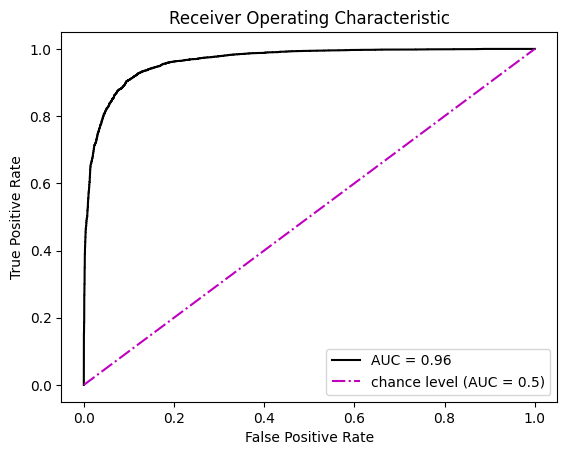

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,
         color = 'k',
         label = 'AUC = %0.2f' % roc_auc)

plt.plot([0,1], [0,1], 'm-.',
         label = 'chance level (AUC = 0.5)')

plt.legend(loc  = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So we can see that the ROC curve is indeed approaching a near-perfect classifier and AUC = 0.96 is a very decent result.